IMPORT THƯ VIỆN

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bước 1: Đọc dữ liệu và hiển thị thông tin dữ liệu
data = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Documents\hocmay\thicuoiky\weather.csv')

# Hiển thị thông tin dữ liệu
print("Thông tin dữ liệu:")
print(data.info())
print("\n")

# Hiển thị thống kê cơ bản của dữ liệu
print("Thống kê cơ bản của dữ liệu:")
print(data.describe())
print("\n")


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 547.0 KB
None


Thống kê cơ bản của dữ liệu:
       Temperature_c      Humidity  Wind_Speed_kmh  Wind_Bearing_degrees  \
count   10000.000000  10000.000000    10000.000000          10000.000000   
mean       11.857208      0.735272       10.813565            185.979700   
std         9.512244      0.195498        6.972569            107.469909   
min       -21.822222   

TIỀN XỬ LÍ DỮ LIỆU

In [3]:
#B2: Tiền xử lí dữ liệu
#Kiểm tra giá trị thiếu 
print("Số lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())

# Xóa các hàng có giá trị thiếu
data.dropna(inplace=True)

Số lượng giá trị thiếu trong mỗi cột:
Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
dtype: int64


In [4]:
# Bước 3: Xác định biến đầu vào (features) và nhãn (labels)
X = data[['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars']]
y = data['Rain'] 

# Chuyển đổi biến mục tiêu thành nhị phân (0: không mưa, 1: có mưa)
y = (y > 0).astype(int)

TRỰC QUAN HÓA DỮ LIỆU BẰNG BIỂU ĐỒ 

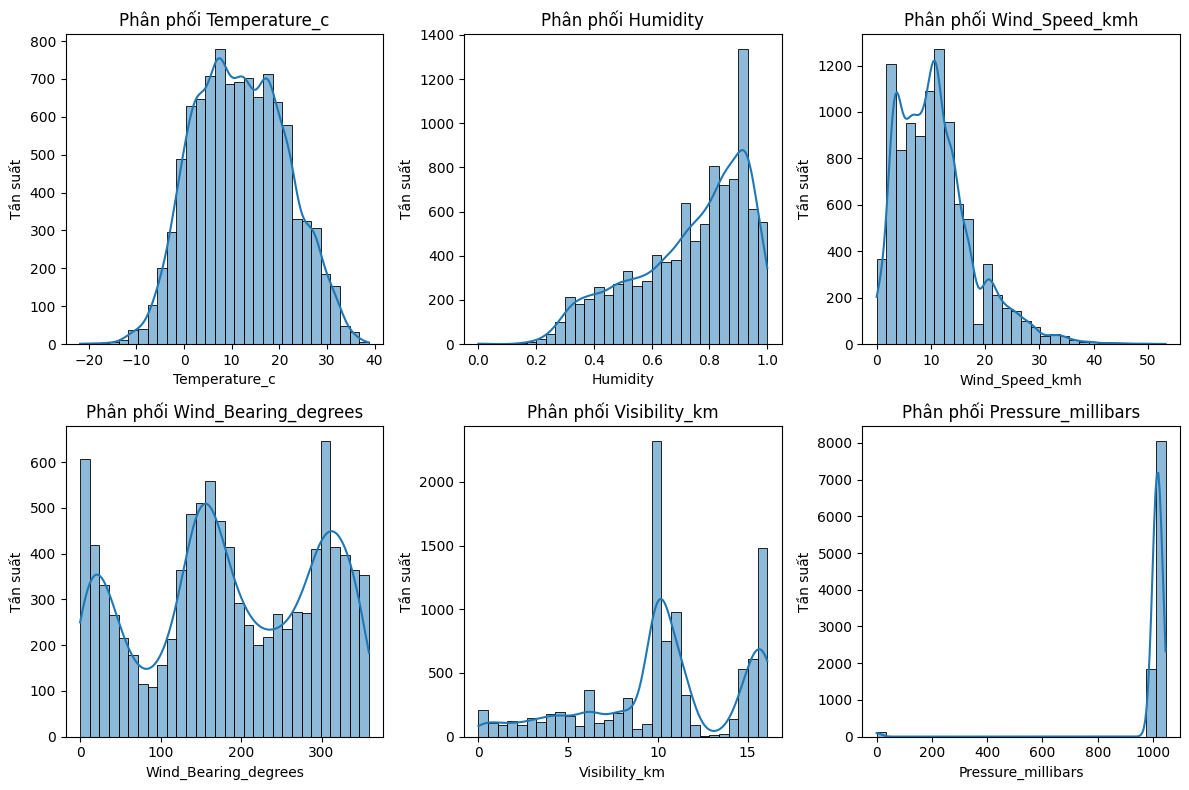

In [5]:
# B4: Biểu đồ này được dùng để hiển thị phân phối của các thuộc tính đầu vào
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Phân phối {column}')
    plt.xlabel(column)
    plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

HUẤN LUYỆN MÔ HÌNH

In [6]:
#B5: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra cho Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

In [7]:
# Bước 6: Dự đoán với dữ liệu mới
new_data = pd.DataFrame({
    'Temperature_c': [-7.105555556],          # Nhiệt độ cao
    'Humidity': [0.88],              # Độ ẩm thấp
    'Wind_Speed_kmh': [15.1662],          # Tốc độ gió nhẹ
    'Wind_Bearing_degrees': [30],   # Hướng gió
    'Visibility_km': [9.9015],          # Tầm nhìn xa
    'Pressure_millibars': [1012.05]    # Áp suất cao
})

# Chuẩn hóa dữ liệu mới
new_data_scaled = scaler.transform(new_data)

# Dự đoán với giá trị mới
new_prediction = logistic_model.predict(new_data_scaled)

In [8]:
# In ra kết quả dự đoán
if new_prediction[0] == 1:
    print("Dự đoán: Có mưa")
else:
    print("Dự đoán: Không mưa")

Dự đoán: Không mưa


In [9]:
# Bước 7: Đánh giá mô hình Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# In ra kết quả Logistic Regression
print(f"Logistic Regression - Accuracy: {accuracy_logistic}")
print("Logistic Regression - Classification Report:")
print(report_logistic)

Logistic Regression - Accuracy: 0.993
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       212
           1       0.99      1.00      1.00      1788

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



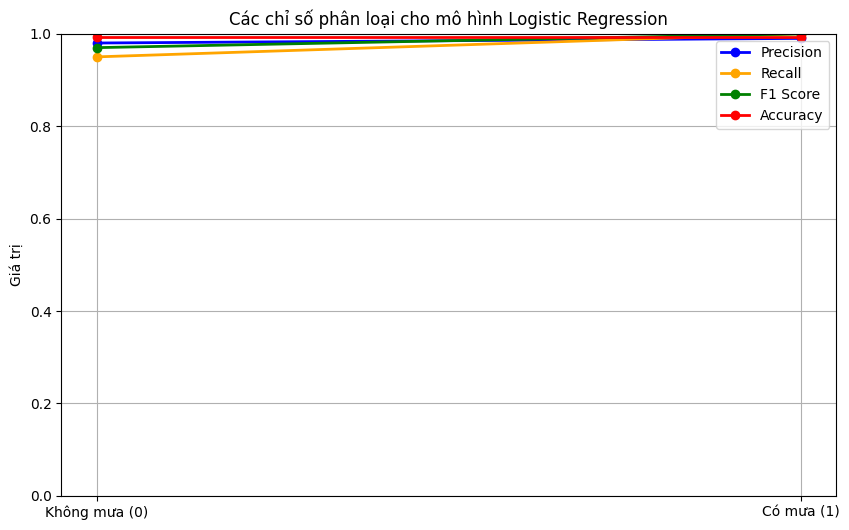

In [10]:

# Giá trị từ báo cáo phân loại
precision = [0.98, 0.99]  # precision cho lớp 0 và 1
recall = [0.95, 1.00]     # recall cho lớp 0 và 1
f1_score = [0.97, 1.00]   # f1-score cho lớp 0 và 1
accuracy = [0.993, 0.993] # Độ chính xác cho cả hai lớp (giá trị cố định)
labels = ['Không mưa (0)', 'Có mưa (1)']

# Bước 8: Vẽ biểu đồ đường cho các chỉ số
plt.figure(figsize=(10, 6))

# Vẽ đường cho precision
plt.plot(labels, precision, marker='o', color='blue', linestyle='-', linewidth=2, label='Precision')
# Vẽ đường cho recall
plt.plot(labels, recall, marker='o', color='orange', linestyle='-', linewidth=2, label='Recall')
# Vẽ đường cho f1-score
plt.plot(labels, f1_score, marker='o', color='green', linestyle='-', linewidth=2, label='F1 Score')
# Vẽ đường cho accuracy
plt.plot(['Không mưa (0)', 'Có mưa (1)'], accuracy, marker='o', color='red', linestyle='-', linewidth=2, label='Accuracy')

plt.ylim(0, 1)  # Đặt giới hạn cho trục y
plt.title('Các chỉ số phân loại cho mô hình Logistic Regression')
plt.ylabel('Giá trị')
plt.grid()
plt.legend()
plt.show()
